# In this notebook, we're going to cover some of the most fundamental concepts of tensors using TensorFlow
## More specifically, we going to cover:
* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors & NumPy
* Using @tf.functions(a way to speed up your regular Python functons)
* Using GPU with TensorFlow(or TPUs)
* Exercise to try for yourself!

# Introduction to Tensors

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [ ]:
# Create a vector
vector = tf.constant([10,12])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 12], dtype=int32)>

In [ ]:
# check the dimension of our vector
vector.ndim

1

In [ ]:
# Create a matrix (has more than 1 dimension)
matrix = tf.constant([[19,3],
                      [12,6]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[19,  3],
       [12,  6]], dtype=int32)>

In [ ]:
matrix.ndim

2

In [ ]:
# Create another matrix
another_matrix = tf.constant([[12., 4.],
 [34., 6.],
  [8., 5.]], dtype=tf.float16) # specify the data type with dtpe parameter
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[12.,  4.],
       [34.,  6.],
       [ 8.,  5.]], dtype=float16)>

In [ ]:
# what's the number of dimensions of another_matrix?
another_matrix.ndim

2

In [ ]:
# Let's create a tensor
tensor = tf.constant([[[1, 2, 3],[4, 5, 6]],
                      [[7, 8, 9],[10, 11, 12]],
                      [[13, 14, 15],[16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim

3

What we've created so far:
* Scalar: a single number
* Vector: a number with direction(e.g. wind speed and direction)
* Matrix: a 2-dimensional array of numbers
* Tensor: an n-dimensional array of numbers(when n can be any number, a 0-dimensional tensor is a scalar, a 1-dimensional tensor is a vector)

# Creating tensors with `tf.Variable`

In [ ]:
changeable_tensor = tf.Variable([19,5])
unchangeable_tensor = tf.constant([3,5])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([19,  5], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 5], dtype=int32)>)

In [ ]:
# Let's try change one of the elements in our changeable tensor
# changeable_tensor[0] = 7 # you will get error
changeable_tensor[0].assign(6)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([6, 5], dtype=int32)>

In [ ]:
# Let's try change our unchangeable tensor
# unchangeable_tensor[0].assign(7)
# unchangeable_tensor

Note: Rarely in practice will you need to decide whether to use `tf.constant` or `tf.Variable` to create tensors, as TensorFlow does this for you. However, if in doubt, use `tf.constant` and change it later if needed

# Creating random tensors
Random tensors are tensors of some abitrary size which contain random numbers

In [ ]:
# create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42)  # set seed for reproducibility
random_1 = random_1.normal(shape=(3,2))
random_2 = tf.random.Generator.from_seed(42)  # set seed for reproducibility
random_2 = random_2.normal(shape=(3,2))

In [ ]:
#Are thye equal?
random_1, random_2 , random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

### shuffle the order of elements in a tensor

In [ ]:
# shuffle a tensor (valuable for when want to shuffle your data so the inherent order doesn't effect learning)
not_shuffled = tf.constant([[19,3],
                      [12,6],
                       [52,96]])
# shuffle our non-shuffled tensor
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[12,  6],
       [52, 96],
       [19,  3]], dtype=int32)>

In [ ]:
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[19,  3],
       [12,  6],
       [52, 96]], dtype=int32)>

It looks like if we want our shuffled tensors to be in the same order, we've got to use the global level random seed as well as the operation level random seed:

> If both the global and the operation seed are set: Both seeds are used in conjuction to determine the random sequence.

In [ ]:
# tf.random.set_seed(42)  # global level random seed
tf.random.shuffle(not_shuffled, seed=42) # operation level random seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52, 96],
       [19,  3],
       [12,  6]], dtype=int32)>

### Other ways to make tensors

In [ ]:
# create a tensor of all ones
tf.ones([4, 6], dtype= tf.int32)

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]], dtype=int32)>

In [ ]:
# create a tensor of all zeroes
tf.zeros([4,4])

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Turn NumPy arrays into tensors
The main difference between `NumPy arrays` and `TensorFlow tensors` is that tensors can be run on a `GPU Computing`.

In [ ]:
# You can also turn NumPy arrays into tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) # create a NumPy array between 1 and 25
numpy_A

# X = tf.constant(some_matrix) # capital for matrix or tensor
# y = tf.constant(vector) # non-capital for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
A = tf.constant(numpy_A, shape=(2,3,4))
B = tf.constant(numpy_A)
A, B

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

In [ ]:
A.ndim

3

### Getting information from tensors
When dealing with tensors you probably want to be aware of the following attributes:
* Shape
* Rank
* Axis or dimension
* Size

In [ ]:
# Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros(shape=(2,3,4,5))
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

<!-- # `This means:

# 2 blocks (0, 1)

# Each block has 3 matrices (0, 1, 2)

# Each matrix has 4 rows

# Each row has 5 columns` -->

This means(rank_4_tensor):

* 2 blocks (0, 1)
* Each block has 3 matrices (0, 1, 2)
* Each matrix has 4 rows
* Each row has 5 columns

In [ ]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [ ]:
rank_4_tensor[0][1] # Getting second matrix (index 1) of first block (index 0)


<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
rank_4_tensor[0][1][0] # Getting first row (index 0) of second matrix (index 1) of first block (index 0)


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
rank_4_tensor[0][1][3][4] # Getting element at row index 3, column index 4 of second matrix (index 1) of first block (index 0)


<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
2 * 3 * 4 * 5

120

In [ ]:
# Get various attributes of our tensor
print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along the 0 axis:", rank_4_tensor.shape[0])
print("Elements along the last axis:", rank_4_tensor.shape[-1])
print("Total number of elements in our tensors:", tf.size(rank_4_tensor))
print("Total number of elements in our tensors:", tf.size(rank_4_tensor).numpy())

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along the 0 axis: 2
Elements along the last axis: 5
Total number of elements in our tensors: tf.Tensor(120, shape=(), dtype=int32)
Total number of elements in our tensors: 120


### Indexing tensors
Tensors can be indexed just like Python lists.

In [ ]:
# Get the first 2 elements of each dimension
rank_4_tensor[:2, :2, :2, 2:]

<tf.Tensor: shape=(2, 2, 2, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

In [ ]:
# Get the first element from each dimension from each index except for the final one
rank_4_tensor[:1, :1, :1, :].numpy()

array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)

✅ Final Meaning:
Select the first element from the first three dimensions,
and everything from the last dimension.

In [ ]:
rank_4_tensor[:1, :1, :1, :].numpy().tolist()

[[[[0.0, 0.0, 0.0, 0.0, 0.0]]]]

In [ ]:
rank_4_tensor[:1, :, :1, :1].numpy().tolist()

[[[[0.0]], [[0.0]], [[0.0]]]]

In [ ]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.range(12)

In [ ]:
rk_2_ts = tf.reshape(rank_2_tensor, (3,4))


In [ ]:
rk_2_ts, rk_2_ts.ndim

(<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]], dtype=int32)>,
 2)

In [ ]:
# Get the last item of each of row of our rank 2 tensor
rk_2_ts[:,-1].numpy()

array([ 3,  7, 11], dtype=int32)

In [ ]:
# Adding in extra dimension to our rank 2 tensor
rank_3_tensor = rk_2_ts[..., tf.newaxis]  # ... --> means every axix before the last one or :, :, in this case
rank_3_tensor

<tf.Tensor: shape=(3, 4, 1), dtype=int32, numpy=
array([[[ 0],
        [ 1],
        [ 2],
        [ 3]],

       [[ 4],
        [ 5],
        [ 6],
        [ 7]],

       [[ 8],
        [ 9],
        [10],
        [11]]], dtype=int32)>

In [ ]:
# Alternative to tf.newaxis
tf.expand_dims(rk_2_ts, axis=-1) # "-1" means expand the final axis

<tf.Tensor: shape=(3, 4, 1), dtype=int32, numpy=
array([[[ 0],
        [ 1],
        [ 2],
        [ 3]],

       [[ 4],
        [ 5],
        [ 6],
        [ 7]],

       [[ 8],
        [ 9],
        [10],
        [11]]], dtype=int32)>

In [ ]:
# Expand 0-axis
tf.expand_dims(rk_2_ts, axis=0)

<tf.Tensor: shape=(1, 3, 4), dtype=int32, numpy=
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]], dtype=int32)>

In [ ]:
# Expand 1-axis
tf.expand_dims(rk_2_ts, axis=1)

<tf.Tensor: shape=(3, 1, 4), dtype=int32, numpy=
array([[[ 0,  1,  2,  3]],

       [[ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11]]], dtype=int32)>

### Manipulating tensors (tensor operations)

**Basic operations**

`+`, `-`, `*`, `/`

In [ ]:
# You can add values to a tensor using the addition operator
tensor = tf.constant([[10, 7],
                      [3, 4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
# but Origninal tensor is unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
# Multiplication also works
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [ ]:
# Subtraction also
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [ ]:
# division also work
tensor // 2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 3],
       [1, 2]], dtype=int32)>

In [ ]:
# We can also do it by using the tensorflow built-in function too
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

> **Note** for larger tensor , use tensorflow inbuilt lib which gives better performance than hard code operation like basic or anyother things

In [ ]:
# Doing all the operations even using inbuil library but original tensor didn't change
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

### Matrix mulitplication

In machine learning, matrix multiplication is one of the most common tensor operations

There are two rules our tensors (or matches) need to fulfil if we're going to matrix multiply them:
1. The inner dimensions must match
2. The resulting matrix has the shape of outer dimensions

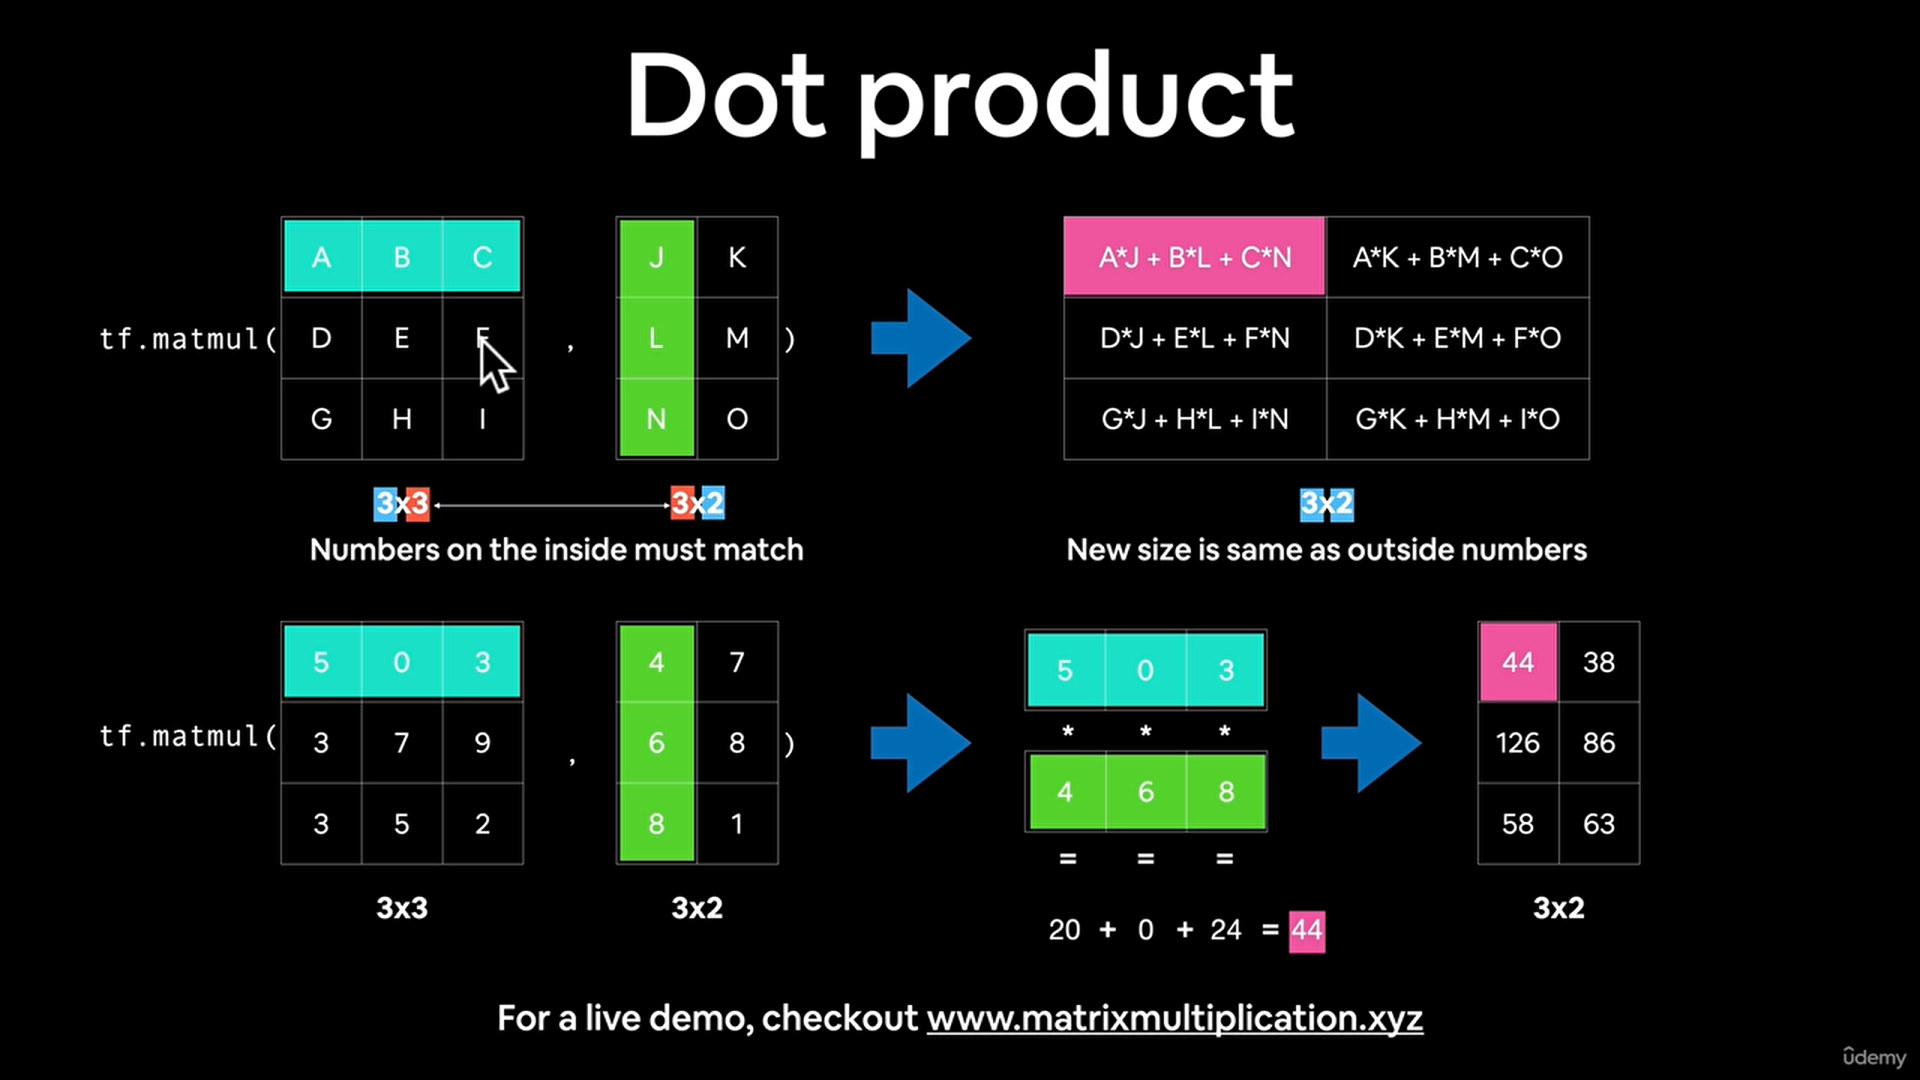

In [ ]:
print(tensor)
tf.matmul(tensor, tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
tensor, tensor


(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>)

In [ ]:
tensor * tensor  # it didn't follow the rule of matix multiplication , just doing it by element multiply with corresponding index element

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  9,  16]], dtype=int32)>

In [ ]:
# Matrix multiplication with Python operator `@` symbol
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
tensor.shape

TensorShape([2, 2])

In [ ]:
# create a tensor (3,2) tensor
x = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])

y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])


In [ ]:
x.numpy(), y.numpy()

(array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32),
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32))

In [ ]:
x.shape, y.shape

(TensorShape([3, 2]), TensorShape([3, 2]))

In [ ]:
# Try to matrix multiply tensors of same shape
x * y  # working bec it does not follow matric mult. law
# Compatible shapes: [3,2] vs. [3,2] but not size

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 7, 16],
       [27, 40],
       [55, 72]], dtype=int32)>

In [ ]:
# x @ y  # Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2]

In [ ]:
# tf.matmul(x, y) # Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2]

In [ ]:
# Let's change the shape of y
reshaped_y= tf.reshape(y, (2, 3))
reshaped_y,

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[ 7,  8,  9],
        [10, 11, 12]], dtype=int32)>,)

In [ ]:
# x * reshaped_y  #Incompatible shapes: [3,2] vs. [2,3]

In [ ]:
x @ reshaped_y

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
tf.matmul(x, reshaped_y)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
# Can do the same with transpose
x, tf.transpose(x), tf.reshape(x, shape=(2, 3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

In [ ]:
# Try matrix multiplication with transpose rather than reshape
tf.matmul(tf.transpose(x), y), tf.matmul(x, tf.transpose(y))

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 89,  98],
        [116, 128]], dtype=int32)>,
 <tf.Tensor: shape=(3, 3), dtype=int32, numpy=
 array([[ 23,  29,  35],
        [ 53,  67,  81],
        [ 83, 105, 127]], dtype=int32)>)

### **The dot product**
Matrix multiplication is also referred to as the dot product.
You can perform matrix multiplication using:
* `tf.matmul()`
* `tf.tensordot()`
* `@`

In [ ]:
# Perform the dot product on x and y (requires x or y to be transposed)
tf.tensordot(tf.transpose(x), y ,axes = 1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [ ]:
# Perform matrix multplication between x and y (transposed)
tf.matmul(x, tf.transpose(y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [ ]:
# Perform matrix multiplication between x and y (reshaped)
tf.matmul(x, tf.reshape(y, shape=(2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [ ]:
# check the values of y, reshape y and transposed y
print("Normal Y:")
print(y, '\n')
print('y reshaped to (2, 3):')
print(tf.reshape(y, (2, 3)), '\n')
print("y transposed:")
print(tf.transpose(y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

y reshaped to (2, 3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


In [ ]:
tf.matmul(x, tf.transpose(y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

>**Note** Generally, when performing matrix multiplication on two tensors and one of the axes doesn't line up, you will transpose(rather than reshaping) one of the tensors to get satisfy the matrix multiplication rule.

### Changing the datatype of a tensor

In [ ]:
tf.__version__


'2.18.0'

In [ ]:
# Create a new tensor with default datatype (float32)
b = tf.constant([1.7, 7.4])
B, b.dtype

(<tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>,
 tf.float32)

In [ ]:
c = tf.constant([7, 10])
c, c.dtype

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>,
 tf.int32)

In [ ]:
# Change from float32 to float16 (reduced precision)
D = tf.cast(b, dtype=tf.float16)
D, D.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16)

In [ ]:
# Change from int32 to float32
E = tf.cast(c, dtype=tf.float32)
E, E.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>,
 tf.float32)

In [ ]:
E_float16 = tf.cast(E, dtype=tf.float16)
E_float16

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([ 7., 10.], dtype=float16)>

### Aggregating tensors
Aggregating tensors = condensing them from multiple values down to a smaller amount of values

In [ ]:
#Get the absolute values
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [ ]:
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

Let's go through the following forms of aggregation:
* Get the minimum
* Get the maximum
* Get the mean of tensor
* Get the sum of tensor

In [ ]:
# Create a random tensor with values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0, 100, size = 50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([ 8, 43, 49,  1,  9, 57, 85, 38,  9, 75, 68, 31, 47, 90, 79, 74, 40,
       61, 21, 97, 20, 35, 67, 13, 86, 63, 79, 69, 73, 23, 19, 37, 62,  3,
       72, 62, 67, 86, 59, 20,  6, 76, 44, 90, 50, 84, 32, 62, 24, 30])>

In [ ]:
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [ ]:
# Find the minimum
tf.reduce_min(E), np.min(E.numpy())

(<tf.Tensor: shape=(), dtype=int64, numpy=1>, np.int64(1))

In [ ]:
# Find the maximum
tf.reduce_max(E) , np.max(E.numpy())

(<tf.Tensor: shape=(), dtype=int64, numpy=97>, np.int64(97))

In [ ]:
# Find the mean
tf.reduce_mean(E), np.mean(E.numpy())

(<tf.Tensor: shape=(), dtype=int64, numpy=49>, np.float64(49.9))

In [ ]:
# Find the sum
tf.reduce_sum(E), np.sum(E.numpy())

(<tf.Tensor: shape=(), dtype=int64, numpy=2495>, np.int64(2495))

**Exercise:** With what we've just learned, find the variance and standard deviation of our `E` tensor using TensorFlow methods.

In [ ]:
import tensorflow_probability as tfp

In [ ]:
# Find the variance of our tensor
tfp.stats.variance(E) # first we need to import tensorflow_probability

<tf.Tensor: shape=(), dtype=int64, numpy=739>

In [ ]:
# Another way without  using tensorflow_probability
tf.math.reduce_variance(tf.cast(E, dtype = tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=738.6900024414062>

In [ ]:
# Find the standard deviation
tf.math.reduce_std(tf.cast(E, dtype = tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=27.178852081298828>

### Find the positional maximum and minimum

In [ ]:
# Create a new tensor for finding positional minimum and maximum
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [ ]:
# find the positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [ ]:
# Index on our largest value position
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.967138409614563>

In [ ]:
# Find the max value of F
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.967138409614563>

In [ ]:
# check for equality
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Find the positional minimum
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [ ]:
# Find the minimum using the positional minimum index
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463667869567871>

### Squeezing a tensor (removing all single dimensions)

In [ ]:
# Create a tensor to get started
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [ ]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [ ]:
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>,
 TensorShape([50]))

### One-hot enncoding tensors

In [ ]:
# Create a list of indices
some_list = [0,1,2,3] # could be red, green, blue, purple

# One hot encode our list of indices
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [ ]:
# Specify custom values for one hot encoding
tf.one_hot(some_list, depth=4, on_value='yo I love deep learning', off_value="I also like to dance")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'yo I love deep learning', b'I also like to dance',
        b'I also like to dance', b'I also like to dance'],
       [b'I also like to dance', b'yo I love deep learning',
        b'I also like to dance', b'I also like to dance'],
       [b'I also like to dance', b'I also like to dance',
        b'yo I love deep learning', b'I also like to dance'],
       [b'I also like to dance', b'I also like to dance',
        b'I also like to dance', b'yo I love deep learning']],
      dtype=object)>

In [ ]:
# Create a list of indices
lists = [0,1,2,3] # could be red, green, blue, purple

# One hot encode our list of indices
tf.one_hot(lists, depth=3)

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)>

In [ ]:
tf.one_hot(lists, depth=4, on_value=2, off_value=3)

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[2, 3, 3, 3],
       [3, 2, 3, 3],
       [3, 3, 2, 3],
       [3, 3, 3, 2]], dtype=int32)>

### Squaring, log, square root

In [ ]:
# Create a new tensor
H = tf.range(1, 10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [ ]:
# Square it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [ ]:
# Find the squareroot (will error, method requires non-int type)
# tf.sqrt(H)

In [ ]:
# Find the squareroot
tf.sqrt(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.2360678, 2.4494896,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [ ]:
# Find the log
tf.math.log(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### Tensors and NumPy
TensorFlow interacts beautifully with NumPy arrays.

**Note:** One of the main differences between a TensorFlow tensor and a NumPy array is that a TensorFlow tensor can be run on a GPU or TPU (for faster numerical processing).

In [ ]:
# Create a tensor directly from a NumPy array
J = tf.constant(np.array([3., 7., 10.,]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [ ]:
# Convert our tensor back to a NumPy array
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:
# Convert tensor J to a NumPy array
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:
# The default types of each are slightly different
numpy_J = tf.constant(np.array([3., 7., 10.]))
tensor_J = tf.constant([3., 7., 10.])
# Check the datatypes of each
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

###  Finding access to GPUs

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

> **Note:** If you have access to a CUDA-enabled GPU, Tensorflow will automatically use it whenever possible.